# **Personal Details**
**Full name**: Konstantinos Gerogiannis  
**Studies**: Electrical and Computer Engineering, AUTh  
**AEM**: 9638  
**Email**: kostas.gerogiannis04@gmail.com


## **Summary**
In this Colab, we are attempting to achieve the highest possible accuracy on the MNIST dataset, this time using SVM. We will experiment with different models, both linear and non-linear, as well as different parameter values to find the maximum accuracy achievable. Additionally, we will use PCA in a second phase to highlight its capabilities. Finally, we will visualize examples of correct and incorrect categorization. The code is written in the Python language.

## **Importing libraries**

We follow a similar code flow as in the previous Colab where we used MLP neural networks.

First, we import useful libraries:

* 'matplotlib' library for visualizing plots.
* 'time' library for calculating code execution time.
* 'numpy' library for fast mathematical operations and handling large volumes of data.
* 'random' library for random operations in the program.
* 'idx2numpy' library for the appropriate conversion of input data into numpy.

In [2]:
!pip install idx2numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=e3c4127e7906eb85d6d35b4f149319a496581c097c4a67bfdb3ab790fb357b91
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


## **Get MNIST dataset from web**


In [3]:
import urllib.request
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

import gzip
import shutil

with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('train-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('train-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('t10k-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('t10k-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

!rm 'train-images-idx3-ubyte.gz'
!rm 'train-labels-idx1-ubyte.gz'
!rm 't10k-images-idx3-ubyte.gz'
!rm 't10k-labels-idx1-ubyte.gz'

## **Preparing the data**
We store the data in separate training and validation sets and print their dimensions. In this Colab, we also perform additional scaling of values to the range [0,1] from the original range [0,255]. Additionally, we create only 2 classes instead of 10: If the number is odd, it belongs to class 1, while if it is even, it belongs to class 0.

In [4]:
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

dims = np.shape(train_images)
X_train = train_images.reshape(dims[0],dims[1]*dims[2])
y_train = train_labels
print('train set dims: ',dims)
dims = np.shape(test_images)
X_test = test_images.reshape(dims[0],dims[1]*dims[2])
y_test = test_labels
print('test set dims: ',dims)

# scaling to [0,1]
X_train = X_train/255.0
X_test = X_test/255.0

y_train = y_train % 2
y_test = y_test % 2

train set dims:  (60000, 28, 28)
test set dims:  (10000, 28, 28)


### **Create classifiers, test model's accuracy**


Now we import libraries from the sklearn package that will be used to create models. All of them have been used in previous Colabs, except for SVC, which creates a support vector classifier. We also have the constant RANDOM_STATE, to which we assign a specific value so that each time we run the file, the final result does not change due to randomness in some functions, such as train_test_split. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale
RANDOM_STATE = 42
N_JOBS = -1

The following lines of code are copied from a previous Colab and create the KNN and nearest centroid models.

In [7]:
# Let's try with 1 only neighbour
import time

start = time.time()
knn_cls = KNeighborsClassifier(n_neighbors=1,weights='distance',n_jobs=N_JOBS)
knn_cls.fit(X_train,y_train)
y_predict = knn_cls.predict(X_test)
print("KNN CLASSIFIER WITH k=1")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"% (time.time()- start))

# And now with 3 neighbours
start = time.time()
knn_cls2 = KNeighborsClassifier(n_neighbors=3,weights='distance',n_jobs=N_JOBS)
knn_cls2.fit(X_train,y_train)
y_predict = knn_cls2.predict(X_test)
print("KNN CLASSIFIER WITH k=3")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"% (time.time()- start))


# Finally, we will see the results using the nearest centroid classifier
start = time.time()
cls3 = NearestCentroid()
cls3.fit(X_train,y_train)
y_predict = cls3.predict(X_test)
print("NEAREST CENTROID CLASSIFIER")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"% (time.time()- start))

KNN CLASSIFIER WITH k=1
Model accuracy score: 0.984
Model total time: 41.137
KNN CLASSIFIER WITH k=3
Model accuracy score: 0.985
Model total time: 44.144
NEAREST CENTROID CLASSIFIER
Model accuracy score: 0.803
Model total time: 0.190


### **Results**
The accuracy results of the above models are summarized in the following table:

|  Classifier     | Accuracy score | Total time(sec) |
| :-----------:   | :-----------:  | :-----------: |
| KNN with k=1    | 0.984          | 41.1          |
| KNN with k=3    | 0.985          | 44.1          |
| Nearest Centroid| 0.803          | 0.2           |

There is a slight improvement in the performance of KNN compared to the accuracy it achieved when we had 10 classes.

### **Reducing the samples we will use**

Here, we choose to randomly keep only 40% of the initially available data for training the model, as even this way, the model training is time-consuming. We print the new dimensions to illustrate the difference.

In [ ]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size = 0.2, train_size = 0.4 ,random_state = RANDOM_STATE)

dims = np.shape(X_train)
print("Training set new dims: ", dims)

### **Creating Support Vector Classifiers**


### **First Approach**

As a first approach, we used the rbf kernel and set the variables C and gamma to take values on a logarithmic scale.

In [ ]:
for C in [0.01, 0.1, 1, 10, 100]:
  for gamma in [0.01,0.1,1,10]:
    start = time.time()
    non_linear_classifier = SVC(kernel='rbf', random_state = RANDOM_STATE, C=C, gamma = gamma)
    non_linear_classifier.fit(X_train,y_train)
    y_predict = non_linear_classifier.predict(X_test)
    print("PARAMETERS:")
    print("C = %.2f and gamma = %.2f" %(C,gamma))
    print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
    print("Total time: %.3f seconds"%(time.time()-start))
    print('\n')

The results are summed up on the following table:

|  C  | gamma |accuracy score| total time (secs) |
|:---:|:-----:|:------------:|:-----------------:|
|0.01 | 0.01  |0.603         |591                |
|0.01 | 0.1   |0.507         |648                |
|0.01 | 1     |0.507         |801                |
|0.01 | 10    |0.507         |767                |
|0.1  | 0.01  |0.794         |456                |
|0.1  | 0.1   |0.507         |590                |
|0.1  | 1     |0.507         |1060               |
|0.1  | 10    |0.507         |1037               |
|1    | 0.01  |0.922         |944                |
|1    | 0.1   |0.585         |1402               |
|1    | 1     |0.507         |1214               |
|1    | 10    |0.507         |1078               |
|10   | 0.01  |0.926         |1023               |
|10   | 0.1   |0.589         |1795               |
|10   | 1     |0.507         |1310               |
|10   | 10    |0.507         |1304               |
|100  | 0.01  |0.926         |1007               |
|100  | 0.1   |0.589         |1765               |
|100  | 1     |0.507         |1313               |
|100  | 10    |0.507         |1279               |

Some quick conclusions that can be drawn from visually inspecting the results are as follows:

* As long as gamma is small, we have higher performance. Beyond a certain point, performance becomes stable and equal to 0.507, which is highly disappointing, almost equivalent to random selection between even and odd.
* Increasing the C parameter seems to increase performance.






### **Second Approach with different values in C and gamma parameters**
We continue the experiments by keeping the same kernel and changing the range of values for the gamma parameter.

In [ ]:
for C in [0.1,1,10,100]:
  for gamma in [0.0001,0.001, 0.01, 0.1]:
    start = time.time()
    non_linear_classifier = SVC(kernel='rbf', random_state = RANDOM_STATE, C=C, gamma = gamma)
    non_linear_classifier.fit(X_train,y_train)
    y_predict = non_linear_classifier.predict(X_test)
    print("PARAMETERS:")
    print("C = %.2f and gamma = %.2f" %(C,gamma))
    print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
    print("Total time: %.3f seconds"%(time.time()-start))
    print('\n')

|  C  | gamma |accuracy score| total time (secs) |
|:---:|:-----:|:------------:|:-----------------:|
|0.1  |0.0001 |0.873         |406                |
|0.1  |0.001  |0.936         |269                |
|0.1  |0.01   |0.794         |539                |
|0.1  |0.1    |0.507         |681                |
|1    |0.0001 |0.906         |255                |
|1    |0.001  |0.970         |170                |
|1    |0.01   |0.922         |1052               |
|1    |0.1    |0.585         |1591               |
|10   |0.0001 |0.943         |189                |
|10   |0.001  |0.979         |256                |
|10   |0.01   |0.926         |1163               |
|10   |0.1    |0.589         |2022               |
|100  |0.0001 |0.971         |169                |
|100  |0.001  |0.977         |260                |
|100  |0.01   |0.926         |1162               |
|100  |0.1    |0.507         |1304               |

## **Let's try with polynomial kernel**

The same process will be followed for the polynomial and linear kernels, and in the end, the results will be compared with graphs.

In [ ]:

for C in [0.1,1,10,100]:
  for gamma in [0.0001,0.001, 0.01, 0.1]:
    start = time.time()
    non_linear_classifier = SVC(kernel='poly', random_state = RANDOM_STATE, C=C, gamma = gamma)
    non_linear_classifier.fit(X_train,y_train)
    y_predict = non_linear_classifier.predict(X_test)
    print("PARAMETERS:")
    print("C = %.2f and gamma = %.2f" %(C,gamma))
    print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
    print("Total time: %.3f seconds"%(time.time()-start))
    print('\n')

|  C  | gamma |accuracy score| total time (secs) |
|:---:|:-----:|:------------:|:-----------------:|
|0.1  |0.0001 |0.508         |607                |
|0.1  |0.001  |0.753         |492                |
|0.1  |0.01   |0.980         |340                |
|0.1  |0.1    |0.979         |354                |
|1    |0.0001 |0.510         |597                |
|1    |0.001  |0.962         |290                |
|1    |0.01   |0.979         |334                |
|1    |0.1    |0.979         |334                |
|10   |0.0001 |0.562         |563                |
|10   |0.001  |0.979         |251                |
|10   |0.01   |0.979         |330                |
|10   |0.1    |0.979         |327                |
|100  |0.0001 |0.753         |473                |
|100  |0.001  |0.980         |332                |
|100  |0.01   |0.979         |331                |
|100  |0.1    |0.979         |329                |

## **And finally we will use linear kernel**

Note that the gamma parameter is not used here. So, we will only test for different values of C.

In [ ]:
for C in [0.01,0.1,1]:
  start = time.time()
  linear_classifier = SVC(kernel='linear', random_state = RANDOM_STATE, C=C)
  linear_classifier.fit(X_train,y_train)
  y_predict = linear_classifier.predict(X_test)
  print("PARAMETERS:")
  print("C = %.2f" %C)
  print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
  print("Total time: %.3f seconds"%(time.time()-start))
  print('\n')

|  C  |accuracy score| total time (secs) |
|:---:|:------------:|:-----------------:|
|0.01 |0.9           |185                |
|0.1  |0.896         |638                |
|1    |0.896         |5145               |

"Chronologically, further increasing the value of the C parameter is prohibitive, so we will stick to the above experiments.

## **Building diagrams**

After conducting numerous experiments, it is worth interpreting the results we obtained through graphs using the matplotlib library.

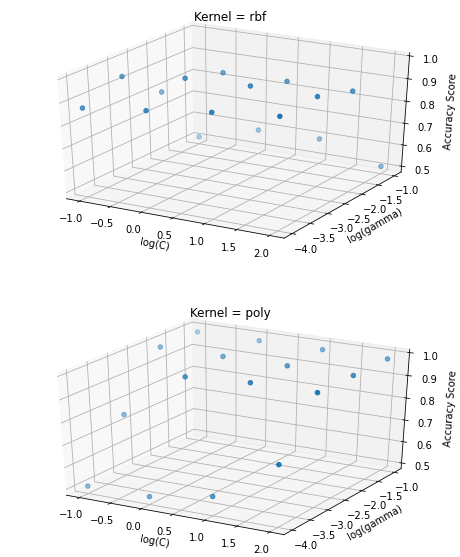

In [8]:
C_rbf = np.log10([0.1,1,10,100])
C_poly = np.log10([0.1,1,10,100])
gamma = np.log10([0.0001,0.001,0.01,0.1])
accuracy_scores_rbf = [0.873,0.936,0.794,0.507,0.906,0.970,0.922,0.585,0.943,0.979,0.926,0.589,0.971,0.977,0.926,0.507]
accuracy_scores_poly = [0.508,0.753,0.980,0.979,0.510,0.962,0.979,0.979,0.562,0.979,0.979,0.979,0.753,0.980,0.979,0.979]

points_c = list()
points_g = list()

for C in C_rbf:
  for g in gamma:
    points_c.append(C)
    points_g.append(g)

fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(211,projection = '3d')

ax.set_title('Kernel = rbf')
ax.set_xlabel('log(C)')
ax.set_ylabel('log(gamma)')
ax.set_zlabel('Accuracy Score')
ax.scatter(points_c,points_g,accuracy_scores_rbf,marker='o')


ax = fig.add_subplot(212,projection='3d')
ax.set_title('Kernel = poly')
ax.set_xlabel('log(C)')
ax.set_ylabel('log(gamma)')
ax.set_zlabel('Accuracy Score')
ax.scatter(points_c,points_g,accuracy_scores_poly,marker='o')
plt.show()

The above 3D plots can give us a preliminary view of where some initial conclusions arise:
* The polynomial kernel is less affected by changes in hyperparameter values and maintains a relatively high accuracy.
* The rbf kernel seems to maintain a lower accuracy.

We will now keep one of the two variables constant to see how accuracy changes only with changes in one hyperparameter.

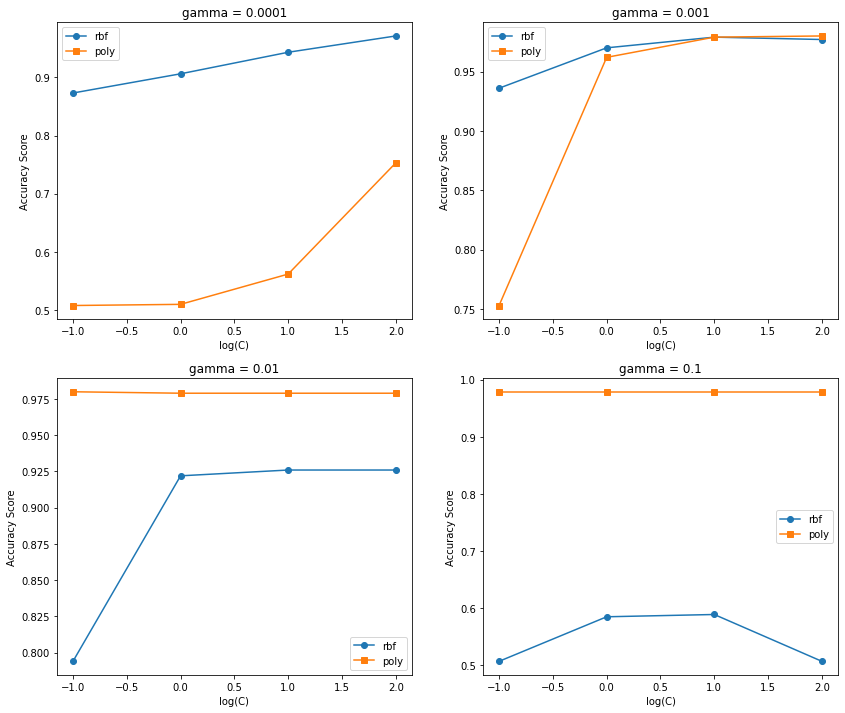

In [9]:
fig = plt.figure(figsize=(14, 12))


ax = fig.add_subplot(221)
ax.set_title('gamma = 0.0001')
ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy Score')
ax.plot(C_rbf,[0.873,0.906,0.943,0.971],marker='o',label='rbf')
ax.plot(C_poly,[0.508,0.510,0.562,0.753],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(222)
ax.set_title('gamma = 0.001')
ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy Score')
ax.plot(C_rbf,[0.936,0.970,0.979,0.977],marker='o',label='rbf')
ax.plot(C_poly,[0.753,0.962,0.979,0.980],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(223)
ax.set_title('gamma = 0.01')
ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy Score')
ax.plot(C_rbf,[0.794,0.922,0.926,0.926],marker='o',label='rbf')
ax.plot(C_poly,[0.980,0.979,0.979,0.979],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(224)
ax.set_title('gamma = 0.1')
ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy Score')
ax.plot(C_rbf,[0.507,0.585,0.589,0.507],marker='o',label='rbf')
ax.plot(C_poly,[0.979,0.979,0.979,0.979],marker='s',label='poly')
ax.legend()
plt.show()

***Observations***
* Both kernels have the highest accuracy for γ=0.0001 and γ=0.01, respectively.
* Increasing C appears to result in higher accuracy.
* The maximum accuracy achieved by the models is around 98%.
* For some values of the γ parameter, accuracy remains constant regardless of changes in the value of C.

Let's now keep the C parameter constant and see how accuracy changes with respect to γ.

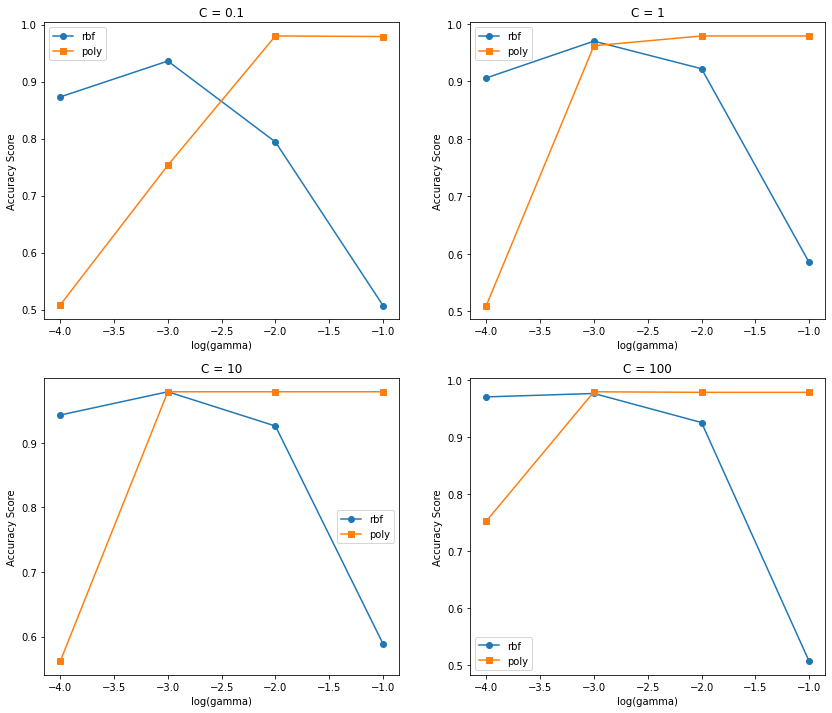

In [10]:
fig = plt.figure(figsize=(14, 12))


ax = fig.add_subplot(221)
ax.set_title('C = 0.1')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Accuracy Score')
ax.plot(gamma,[0.873,0.936,0.794,0.507],marker='o',label='rbf')
ax.plot(gamma,[0.508,0.753,0.980,0.979],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(222)
ax.set_title('C = 1')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Accuracy Score')
ax.plot(gamma,[0.906,0.970,0.922,0.585],marker='o',label='rbf')
ax.plot(gamma,[0.510,0.962,0.979,0.979],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(223)
ax.set_title('C = 10')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Accuracy Score')
ax.plot(gamma,[0.943,0.979,0.926,0.589],marker='o',label='rbf')
ax.plot(gamma,[0.562,0.979,0.979,0.979],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(224)
ax.set_title('C = 100')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Accuracy Score')
ax.plot(gamma,[0.971,0.977,0.926,0.507],marker='o',label='rbf')
ax.plot(gamma,[0.753,0.980,0.979,0.979],marker='s',label='poly')
ax.legend()
plt.show()

***Observations***
* The rbf kernel performs well for small values of γ, while the polynomial kernel performs well for larger values.
* A similar pattern is followed in the chart for each value of C.
* The most suitable γ for both charts simultaneously would be γ=0.001, as it achieves the highest accuracy for most C values.

For the linear kernel, three simulations were performed since the learning time quickly became prohibitive, as shown in the chart below.

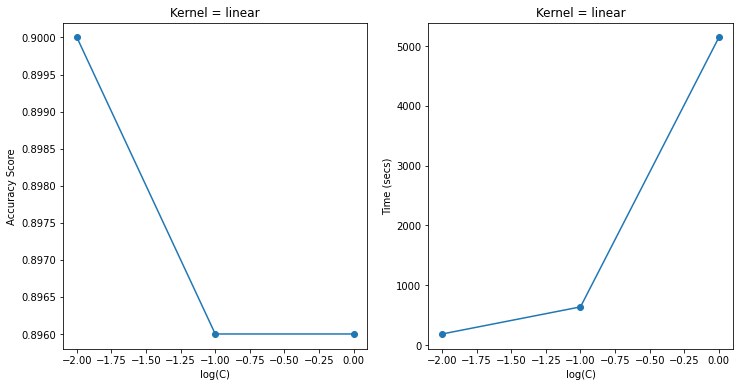

In [11]:
C_linear = np.log10([0.01,0.1,1])
accuracy_scores_linear = [0.9,0.896,0.896]
times_linear = [185,638,5145]

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax.set_title('Kernel = linear')
ax.set_xlabel('log(C)')
ax.set_ylabel('Accuracy Score')
ax.plot(C_linear,accuracy_scores_linear,marker='o')

ax = fig.add_subplot(122)
ax.set_title('Kernel = linear')
ax.set_xlabel('log(C)')
ax.set_ylabel('Time (secs)')
ax.plot(C_linear,times_linear,marker='o')
plt.show()

* The increase in training time is exponential as we increase the C parameter, and it appears that accuracy converges to a certain value. So, the optimal choice is probably to use the classifier with C = 0.01.

## **Comparing Times**
Let's compare the training times on the different kernels.

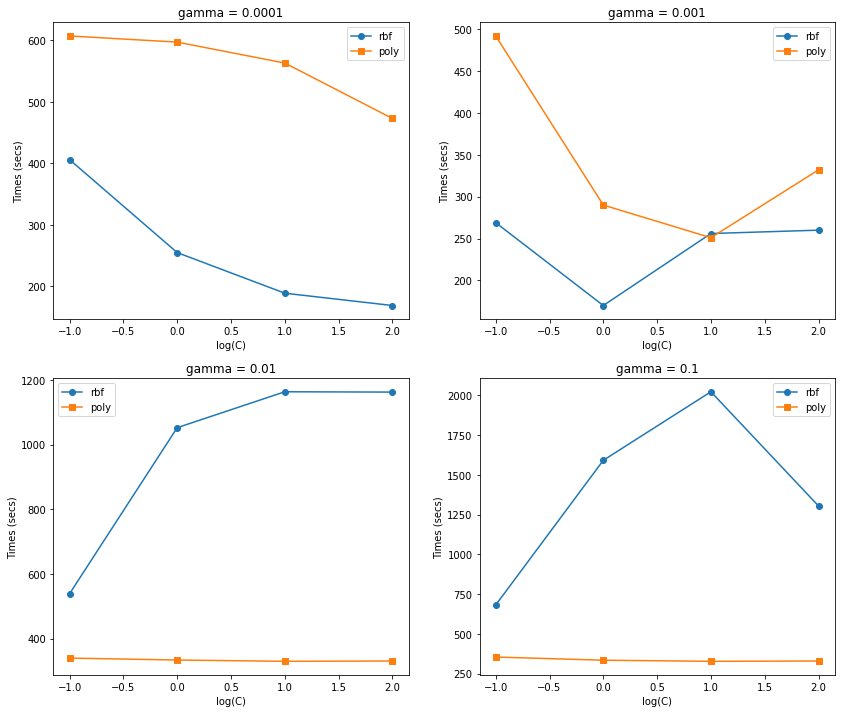

In [12]:
fig = plt.figure(figsize=(14, 12))


ax = fig.add_subplot(221)
ax.set_title('gamma = 0.0001')
ax.set_xlabel('log(C)')
ax.set_ylabel('Times (secs)')
ax.plot(C_rbf,[406,255,189,169],marker='o',label='rbf')
ax.plot(C_poly,[607,597,563,473],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(222)
ax.set_title('gamma = 0.001')
ax.set_xlabel('log(C)')
ax.set_ylabel('Times (secs)')
ax.plot(C_rbf,[269,170,256,260],marker='o',label='rbf')
ax.plot(C_poly,[492,290,251,332],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(223)
ax.set_title('gamma = 0.01')
ax.set_xlabel('log(C)')
ax.set_ylabel('Times (secs)')
ax.plot(C_rbf,[539,1052,1163,1162],marker='o',label='rbf')
ax.plot(C_poly,[340,334,330,331],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(224)
ax.set_title('gamma = 0.1')
ax.set_xlabel('log(C)')
ax.set_ylabel('Times (secs)')
ax.plot(C_rbf,[681,1591,2022,1304],marker='o',label='rbf')
ax.plot(C_poly,[354,334,327,329],marker='s',label='poly')
ax.legend()
plt.show()

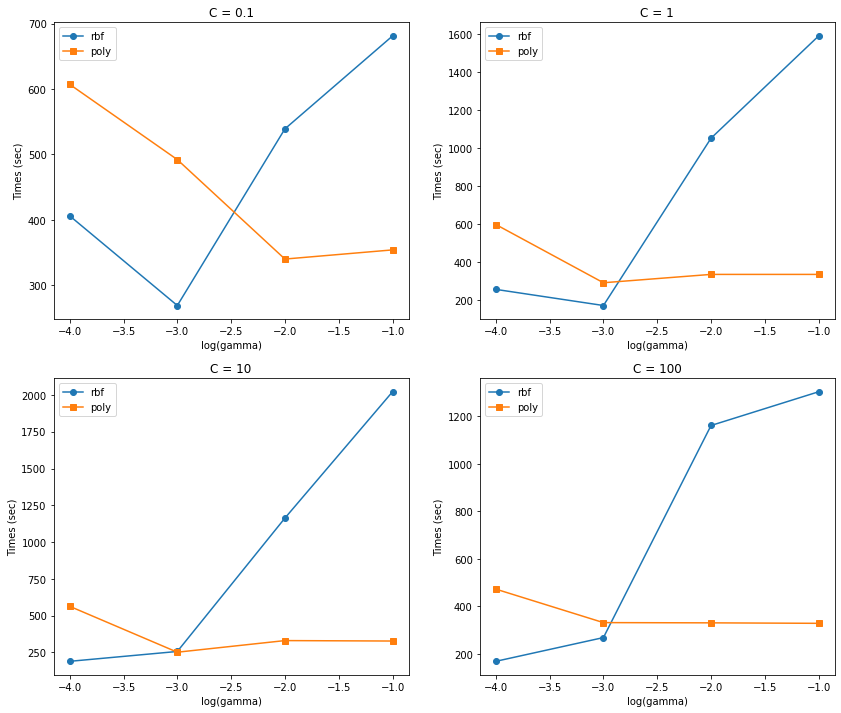

In [13]:
fig = plt.figure(figsize=(14, 12))


ax = fig.add_subplot(221)
ax.set_title('C = 0.1')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Times (sec)')
ax.plot(gamma,[406,269,539,681],marker='o',label='rbf')
ax.plot(gamma,[607,492,340,354],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(222)
ax.set_title('C = 1')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Times (sec)')
ax.plot(gamma,[255,170,1052,1591],marker='o',label='rbf')
ax.plot(gamma,[597,290,334,334],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(223)
ax.set_title('C = 10')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Times (sec)')
ax.plot(gamma,[189,256,1163,2022],marker='o',label='rbf')
ax.plot(gamma,[563,251,330,327],marker='s',label='poly')
ax.legend()

ax = fig.add_subplot(224)
ax.set_title('C = 100')
ax.set_xlabel('log(gamma)')
ax.set_ylabel('Times (sec)')
ax.plot(gamma,[169,269,1162,1304],marker='o',label='rbf')
ax.plot(gamma,[473,332,331,329],marker='s',label='poly')
ax.legend()
plt.show()

## **Reducing training time with PCA**

As has already been noticed and emphasized several times during the development of this Colab, the main problem with the already implemented models is their training time. In this direction, the PCA method will be used, and we will compare the times and the impact on accuracy for the model using the rbf kernel.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
print('Train images dims before pca: ',X_train.shape)
print('Test images dims before pca: ',X_test.shape)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('Train images dims after pca: ',X_train.shape)
print('Test images dims after pca: ',X_test.shape)

The pixels that we will use got reduced from 784 to 153!

In [ ]:
for C in [0.1,1,10,100]:
  for gamma in [0.0001,0.001, 0.01, 0.1]:
    start = time.time()
    non_linear_classifier = SVC(kernel='rbf', random_state = RANDOM_STATE, C=C, gamma = gamma)
    non_linear_classifier.fit(X_train,y_train)
    y_predict = non_linear_classifier.predict(X_test)
    print("PARAMETERS:")
    print("C = %.2f and gamma = %.2f" %(C,gamma))
    print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
    print("Total time: %.3f seconds"%(time.time()-start))
    print('\n')

In the following table, we compare the performance of the two models, without PCA and with PCA for the kernel, and different values of the parameters C and gamma:

**Note: Results marked in bold in the accuracy with PCA column represent an increase in the value, not a decrease.**

|  C  | gamma |accuracy|total time (secs)|accuracy with PCA|total time with PCA(secs)|accuracy reduction %|time reduction %|
|:---:|:-----:|:------:|:------:|:------:|:-----:|:-------:|:-----:|
|0.1  |0.0001 |0.873   |406     |0.811   |176    |7.1      |56.65  |
|0.1  |0.001  |0.936   |269     |0.872   |109    |6.84     |59.48  |
|0.1  |0.01   |0.794   |539     |0.956   |77     |**20.4** |85.71  |
|0.1  |0.1    |0.507   |681     |0.824   |206    |**62.52**|69.75  |
|1    |0.0001 |0.906   |255     |0.866   |121    |4.42     |52.55  |
|1    |0.001  |0.970   |170     |0.915   |85     |5.67     |50     |
|1    |0.01   |0.922   |1052    |0.979   |41     |**5.38** |96.1   |
|1    |0.1    |0.585   |1591    |0.972   |352    |**66.15**|77.88  |
|10   |0.0001 |0.943   |189     |0.89    |83     |5.62     |56.08  |
|10   |0.001  |0.979   |256     |0.959   |50     |2.04     |80.47  |
|10   |0.01   |0.926   |1163    |0.986   |34     |**6.48** |97.08  |
|10   |0.1    |0.589   |2022    |0.973   |352    |**65.2** |82.59  |
|100  |0.0001 |0.971   |169     |0.913   |68     |5.97     |59.76  |
|100  |0.001  |0.977   |260     |0.978   |40     |0        |84.62  |
|100  |0.01   |0.926   |1162    |0.986   |46     |**6.48** |96.04  |
|100  |0.1    |0.507   |1304    |0.973   |371    |**91.9** |71.55  |

* The time reduction when using PCA is extreme. It is usually a reduction of over 50%, and in some cases, it reaches over 90%!!
* Regarding accuracy, in some experiments, there is a decrease, while in others, there is even an increase. The decrease is on the order of 5%, just like the increase. Therefore, accuracy is not negatively affected; on the contrary, it tends to improve.

The tradeoff between accuracy and time does exist in some experiments, but it does not seem to create a problem. Overall, the use of PCA is considered effective and highly beneficial.

## **Examples of correct classifications/Misclassifications**

In [ ]:
def show_image(sample,data):
  x = data[sample]
  # print('Image pixel dimensions = ',torch.Tensor.size(x))
  plt.imshow(x,cmap='gray')

We will use the model that achieves the highest accuracy among those we have created, namely: rbf kernel, c=10, gamma=0.01, and using PCA.

In [ ]:
non_linear_classifier = SVC(kernel='rbf', random_state = RANDOM_STATE, C=10, gamma = 0.01)
non_linear_classifier.fit(X_train,y_train)
y_predict = non_linear_classifier.predict(X_test)
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print('\n')

We print 3 examples of correct classification and 3 examples of misclassification.

In [ ]:
from random import randint
misclassified_images = test_images[y_predict != y_test]
misclassified_true_labels = test_labels[y_predict != y_test]
misclassified_wrong_labels = y_predict[y_predict != y_test]
correct_images = test_images[y_predict == y_test]
correct_labels = test_labels[y_predict == y_test]

random_false_images = list()
random_correct_images = list()
number_of_samples = 3
for i in range(number_of_samples):
  random_false_images.append(randint(0, misclassified_images.shape[0] - 1))
  random_correct_images.append(randint(0, correct_images.shape[0] - 1))


print("Let's print some wrong predictions.")
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
for count in range(number_of_samples):
  ax1 = fig.add_subplot('1'+str(number_of_samples)+str(count+1))
  ax1.title.set_text(f"True value: {misclassified_true_labels[random_false_images[count]]}\npredicted value: {'odd' if misclassified_wrong_labels[random_false_images[count]] % 2==1 else 'even'}")
  ax1.get_xaxis().set_ticks([])
  ax1.get_yaxis().set_ticks([])
  show_image(random_false_images[count],misclassified_images)
plt.show()
print('\n')


print("We can also print correct predictions :)")
fig = plt.figure(figsize=(10,10))
fig.tight_layout()
for count in range(number_of_samples):
  ax1 = fig.add_subplot('1'+str(number_of_samples)+str(count+1))
  ax1.title.set_text(f"predicted value: {'odd' if correct_labels[random_correct_images[count]] % 2==1 else 'even'}")
  ax1.get_xaxis().set_ticks([])
  ax1.get_yaxis().set_ticks([])
  show_image(random_correct_images[count],correct_images)

From the examples of misclassification, we can see that the classifier fails on digits that are difficult to recognize even by humans due to their particular graphical character. The classification is successful in the overwhelming majority of cases.